In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# load VGG16 model

image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

In [3]:
# set dataset folder and target folder
imgdir = './downloads'
targetdir = "./clusters"

# get images
files = glob.glob(os.path.join(imgdir, '*.jpg'))
files.sort()

In [7]:
# Using Keras to get data from image

features = []

for i, imagepath in enumerate(files):
    print("Status:", i+1, "/", len(files), end="\r")
    
    img = image.load_img(imagepath, target_size=(256, 256))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    
    feat = np.array(model.predict(img_data))
    features.append(feat.flatten())


In [8]:
print(np.array(features))

[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.       14.12983   0.       ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.       57.85194   0.       ...  0.       10.100439  0.      ]]


for:  1
for:  2
for:  3
for:  4
for:  5
for:  6
for:  7
for:  8
for:  9
for:  10
for:  11
for:  12
for:  13
for:  14
for:  15
for:  16
for:  17
for:  18
for:  19


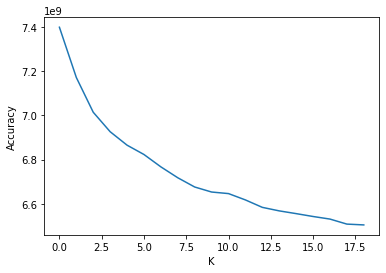

In [9]:
inertias = []

for i in range(1, 20):
    print("for: ", i)
    kmeans = KMeans(n_clusters=i, random_state=0)
    clusters = kmeans.fit(np.array(features))
    inertias.append(kmeans.inertia_)

plt.plot(inertias)
plt.ylabel('Accuracy')
plt.xlabel("K")
plt.show()

In [10]:
number_clusters = 8

kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(features))

In [16]:
# Create target folder
try:
    os.makedirs(targetdir)
except OSError:
    pass

# Copy image to cluster folder 
for i, m in enumerate(kmeans.labels_):
    print("Copy: %s / %s" %(i+1, len(kmeans.labels_)), end="\r")
    cluster_dir = targetdir + "/" + str(m) + "/"
    
    try:
        os.makedirs(cluster_dir)
    except OSError:
        pass
    
    shutil.copy(files[i], cluster_dir + str(i) + ".jpg")